## 8. When Models Meet Data

#### 8.1.1 Data as Vectors

The data represent on table with N as number of examples (row) and D (dimension) as number of features (columns)

We can manipulate the data find potentially better representations by two ways:
1. finding lower-dimensional approximations of the original feature vector -> Principal Component Analysis (PCA), closely related to concepts of __eigenvalue__ and **singular value decomposition**
2. using nonlinear higher-dimensional combinations of the original feature vector -> explicit feature map(?), the main motivation for higher-dimensional representations is that we can construct new features which may take the learning problem easier(?)

##### (Math Check) Eigenvalue

##### (Math Check) 2.7.1 Matrix Representation of Linear Mapping
vectors are objects that can be added together and multiplied by a scalar, and the resulting object is still a vector
notation:
1. B = (b1,...,bn) -> ordered basis
2. B = {b1,...,bn} -> unordered basis
3. B = [b1,...,bn] -> matrix whose columns are vectors

**definition 2.18 (coordinates)** -> this definitions is changing the existing vector on standard basis (e1, e2) to basis vector (I think this customizeable(?)) 

Example of coordinates changes on vector using basis vector (b1, b2) -> b1 = [1, -1]^T, b2 = [1, 1]^T

we have vector \
x = 2*e1 + 3*e2 

standard basis \
e1 = [1, 0]^T \
e2 = [0, 2]^T

vector x can be written as: \
x = 2 * [1, 0]^T + 3 * [0, 1]^T = [2, 3]^T

instead of using standard basis, we want to **represent the same vector** x using a different basis (b1, b2) \
b1 = [1, -1]^T \
b2 = [1, 1]^T 

x as linear combination of b1 and b2 \
x = c1*b1 + c2*b2

finding new coordinate c1, c2 \
x = c1*[1, -1]^T + c2*[1, 1]^T \
x = [[1, 1], [-1, 1]] * [c1, c2]^T = [2, 3]^T \
[c1, c2]^T = [[1, 1], [-1, 1]]^-1 * [2, 3]^T

[[1, 1], [-1, 1]]^-1: \
determinant = (1*1) - ((-1)*1) = 1 + 1 = 2

[[1, 1], [-1, 1]]^-1 = 0.5 * ( [[1, -1], [1, 1]] ) 

[c1, c2]^T = ( 0.5 * ( [[1, -1], [1, 1]] ) ) * [2, 3]^T

[c1, c2]^T = [-0.5, 2.5]^T

In [51]:
## Manual code

# original vector x
x = [[2], [3]]

# basis b1, b2
B = [
    [1, 1],
    [-1, 1]
]

def determinant_2x2(matrix):
    return (matrix[0][0] * matrix[1][1]) - (matrix[0][1] * matrix[1][0]) 

def inverse_2x2(matrix):
    det = determinant_2x2(matrix)

    if det == 0:
        raise ValueError("Matrix is singular, cannto find inverse.")

    inv_det = 1 / det
    inverse = [
        [matrix[1][1] * inv_det, -1 * matrix[0][1] * inv_det],
        [-1 * matrix[1][0] * inv_det, matrix [0][0] * inv_det]
    ]

    return inverse

B_inv= inverse_2x2(B)

def matrix_mult(B_inv, x):
    ## multiply two matrices A (m x n) and B (n x p)
    m = len(B_inv)
    n = len(B_inv[0])
    p = len(x[0]) 

    result = [[0] for _ in range(len(B_inv))]

    for i in range(m):
        for j in range(p):
            for k in range(n):
                result[i][j] += B_inv[i][k] * x[k][j]

    return result

x_new = matrix_mult(B_inv, x)

x_new

[[-0.5], [2.5]]

In [53]:
# Numpy Library

import numpy as np

x = np.array([[2],[3]])

B = np.array([[1, 1], [-1, 1]])

## inverse matrix
B_inv = np.linalg.inv(B)

## The matrix product can be performed using the @ operator (in python >=3.5)
x_new = B_inv @ x

x_new

array([[-0.5],
       [ 2.5]])

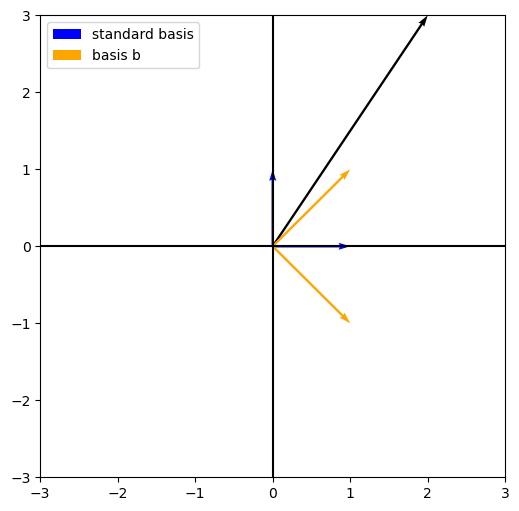

In [139]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.axhline(0, color = 'black')
plt.axvline(0, color = 'black')

## 
plt.quiver(0, 0 , 1, 0, angles='xy', scale_units='xy', scale=1, width=0.005, color='blue' ,label = 'standard basis')
plt.quiver(0, 0 , 0, 1, angles='xy', scale_units='xy', scale=1, width=0.005, color='blue')

plt.quiver(0, 0 , x[0], x[1], angles='xy', scale_units='xy', scale=1, width=0.005, color='black' )

b1 = np.array([1, -1])
b2 = np.array([1, 1])

plt.quiver(0, 0 , b1[0], b1[1], angles='xy', scale_units='xy', scale=1, width=0.005, color='orange', label = 'basis b')
plt.quiver(0, 0 , b2[0], b2[1], angles='xy', scale_units='xy', scale=1, width=0.005, color='orange' )

plt.xlim(-3, 3)
plt.ylim(-3, 3)

plt.legend(loc='upper left')

**definition 2.19 (Transformation Matrix)** 

consider vector spaces (V, W) -> vector \
with ordered bases (B, C) -> coordiante systems for each V and W (V based on B and W based on C) \
and linear mapping Ф : V -> W -> linear mapping from coordinate V to W for Ф (vector equation) \
with transformation matirx AФ -> matrix from all vector equations (become one matrix)

**y_accent = AФ * x_accent**

x_accent is the coordinate vector of x with respect to B coordinate \
y_accent is the coordinate vector of y with respect to C coordinate

this means transformation matrix can be used to map coordinates with respect to an ordered basis in V to coordinates with respect to an ordered basis in W

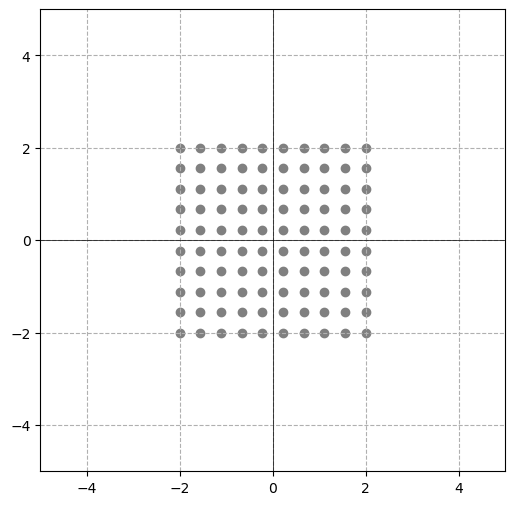

In [259]:
## example

import numpy as np
import matplotlib.pyplot as plt

# original data
x_values = np.linspace(-2, 2, 10) ### create an array consist of 10 numbers between -2 and 2 
y_values = np.linspace(-2, 2, 10)
X, Y = np.meshgrid(x_values, y_values) ### create rectangular grid combination of 10 numbers between -2 and 2 in x coordinates and y coordinates
original_points = np.vstack([X.ravel(), Y.ravel()]) ### X, Y coordinates under matrix 2 x combination of grid 

plt.figure(figsize = (6, 6))
plt.scatter(original_points[0], original_points[1], color = 'gray')

# beautifier
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.axhline(0, color = 'black', linewidth = 0.5)
plt.axvline(0, color = 'black', linewidth = 0.5)
plt.grid(True, linestyle = '--')

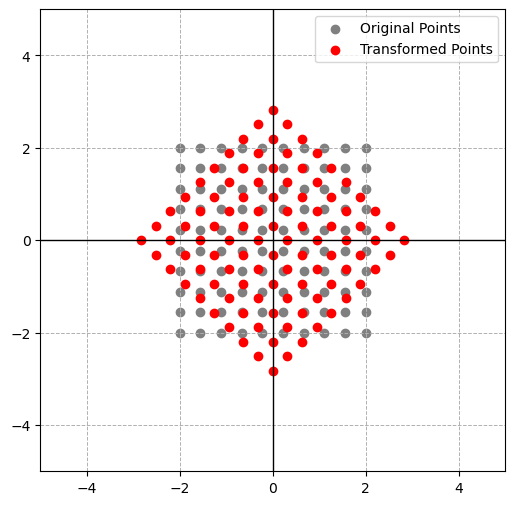

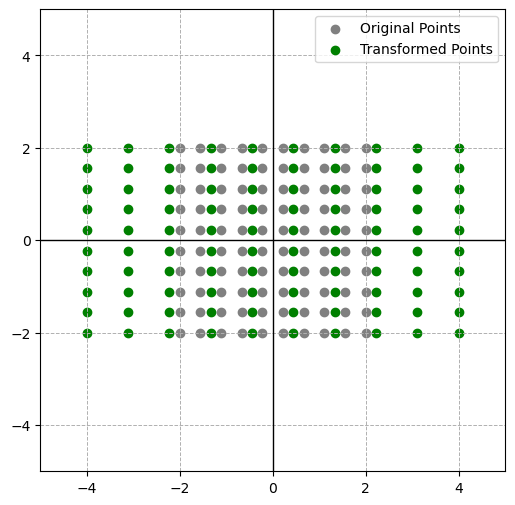

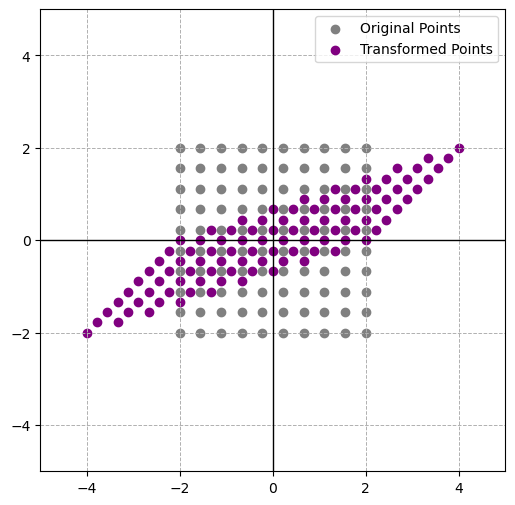

In [261]:
# from original data transform it using transform matrix

## List of Transform Matrix
theta = np.pi / 4 # 45 degress in radians
A1 = np.array([
    [np.cos(theta), -np.sin(theta)],
    [np.sin(theta), np.cos(theta)]
])

A2 = np.array([
    [2, 0],
    [0, 1]
])

A3 = np.array([
    [1.5, -0.5],
    [0.5, -0.5]
])

def plot_transformation(A, color = 'blue'):
    transform_points = A @ original_points

    plt.figure(figsize = (6, 6))
    plt.scatter(original_points[0], original_points[1], color = 'gray', label = 'Original Points')
    plt.scatter(transform_points[0], transform_points[1], color = color, label = 'Transformed Points')

    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)
    plt.grid(True, linestyle = '--', linewidth = 0.7)
    plt.xlim(-5, 5)
    plt.ylim(-5, 5)
    plt.legend()
    
plot_transformation(A1, color = 'red')
plot_transformation(A2, color = 'green')
plot_transformation(A3, color = 'purple')

plt.show()